# Notebook umap
Para el desarrollo de este notebook usamos el mismo dataset del ejercicio 19

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.manifold
import glob
import sklearn.cluster
import umap
import warnings
warnings.filterwarnings('ignore')

Este dataset solo contiene 250 imagenes en tamaño 150x150x3, el dataset venía con muchas mas, pero por cuestiones de los recursos del pc de mi casa, lo recorté para evitar demasiado tiempo en el fit. La selección de las 50 imagenes por cada clase sehizo de forma aleatoria con un script en bash.

In [2]:
files1 = glob.glob('/buildings1/*.jpg')
buildings = []
for filename in files1:
    im = np.float_(plt.imread(filename).flatten())
    buildings.append(im)
    
files2 = glob.glob('/forest1/*.jpg')
forest = []
for filename in files2:
    im = np.float_(plt.imread(filename).flatten())
    forest.append(im)
    
files3 = glob.glob('/glacier1/*.jpg')
glacier = []
for filename in files3:
    im = np.float_(plt.imread(filename).flatten())
    glacier.append(im)
    
files5 = glob.glob('/sea1/*.jpg')
sea = []
for filename in files5:
    im = np.float_(plt.imread(filename).flatten())
    sea.append(im)
    
files6 = glob.glob('/street1/*.jpg')
street = []
for filename in files6:
    im = np.float_(plt.imread(filename).flatten())
    street.append(im)

print(np.shape(buildings),np.shape(forest),np.shape(glacier),np.shape(sea),np.shape(street))

(50, 67500) (50, 67500) (50, 67500) (50, 67500) (50, 67500)


Con los datos leídos, los guardamos en la lista X y creamos los targets respectivos.

In [3]:
X = buildings + forest + glacier + sea + street

t1 = np.full(50, 0)
t2 = np.full(50, 1)
t3 = np.full(50, 2)
t4 = np.full(50, 3)
t5 = np.full(50, 4)
Y = np.concatenate((t1,t2,t3,t4,t5))
print(np.shape(X), np.shape(Y))

(250, 67500) (250,)


Variamos el n_neighbors para valores grandes, sin embargo, el resultado es similar. En el rango de 2 a 11 es donde se presentan algunos cambios en la forma de agrupar las clases. También se varió min_dist y metric. En este caso se tomó un valor de min_dist=0.4 y la metrica 'minkowski'. Además, se dejó un n_neighbors = 7 para el fit de los clusters.

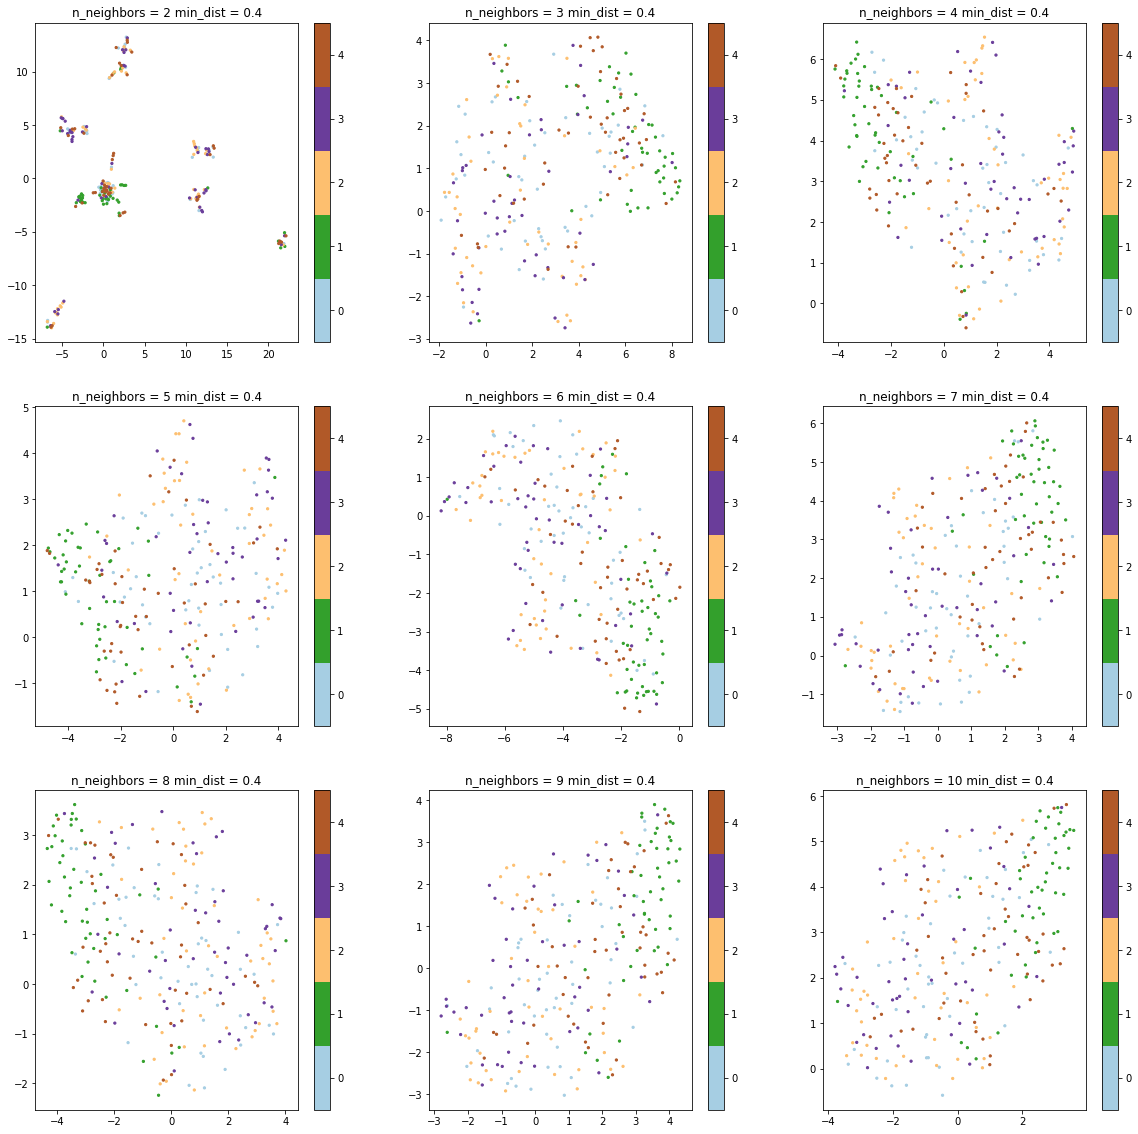

In [44]:
n_neighbors = np.arange(2,11,1)
plt.figure(figsize=(20,20))
min_dist=0.4
for i, j in zip(range(9), n_neighbors):
    reducer = umap.UMAP(n_neighbors = j, min_dist=min_dist)
    reducer.fit(X)
    embedding = reducer.fit_transform(X)
    plt.subplot(3,3,i+1)
    plt.scatter(embedding[:,0], embedding[:,1], c=Y, cmap='Paired', s=5.0)
    plt.title("n_neighbors = {:.0f} min_dist = {:.1f}".format(j, min_dist))
    plt.colorbar(boundaries=np.arange(6)-0.5).set_ticks(np.arange(5))
#plt.savefig('perplexity_values.png')

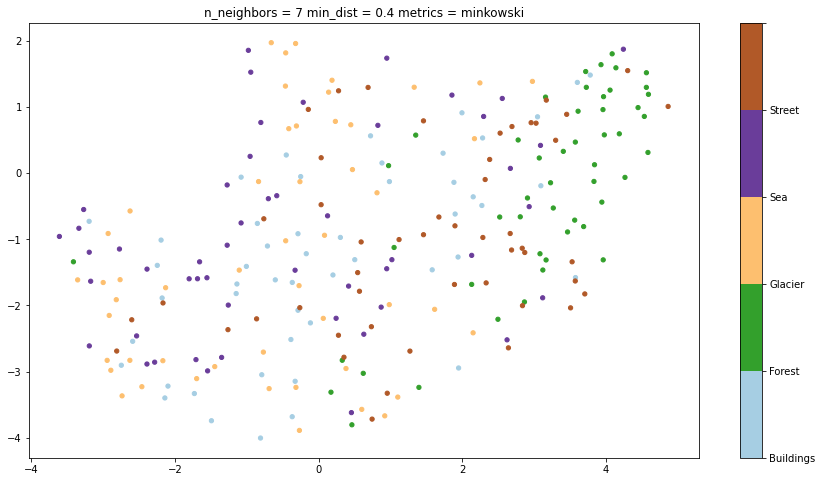

In [51]:
metrics = ['euclidean','manhattan','chebyshev','minkowski']
n_neighbors = 7
min_dist = 0.4
metric = str(metrics[3])
reducer = umap.UMAP(n_neighbors=n_neighbors,min_dist=min_dist,metric=metric)
reducer.fit(X)
embedding = reducer.transform(X)

names = ['Buildings', 'Forest', 'Glacier', 'Sea', 'Street']
plt.figure(figsize=(15,8))
plt.scatter(embedding[:,0], embedding[:,1], c=Y, cmap='Paired', s=18.0)
plt.title("n_neighbors = {:.0f} min_dist = {:.1f} metrics = {}".format(n_neighbors,min_dist,metric))
plt.colorbar(boundaries=np.arange(6)-0.5).set_ticklabels(names)

El umap no realiza una "buena" clasificación. Sin embargo, esto ya es debido al dataset y al poco número de imagenes.

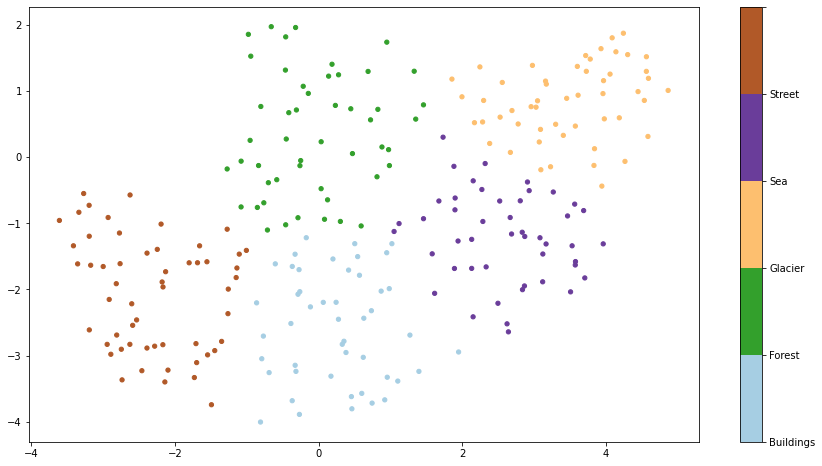

In [52]:
# clusters sobre los resultados de tsne
n_clusters = 5
k_means = sklearn.cluster.KMeans(n_clusters=n_clusters)
k_means.fit(embedding) # training
cluster = k_means.predict(embedding) # predice a cual cluster corresponde cada elmento
distance = k_means.transform(embedding)
plt.figure(figsize=(15,8))
plt.scatter(embedding[:,0], embedding[:,1], c=cluster, cmap='Paired', s=18)
plt.colorbar(boundaries=np.arange(6)-0.5).set_ticklabels(names)
#plt.savefig('kmeans_cluster.png')

Al igual que en el caso de tsne, no se puede realizar una buena clasificación, pues en algunas clases aparecen imagenes que no corresponden, como bosques en glaciares, etc.

(250, 150, 150, 3)


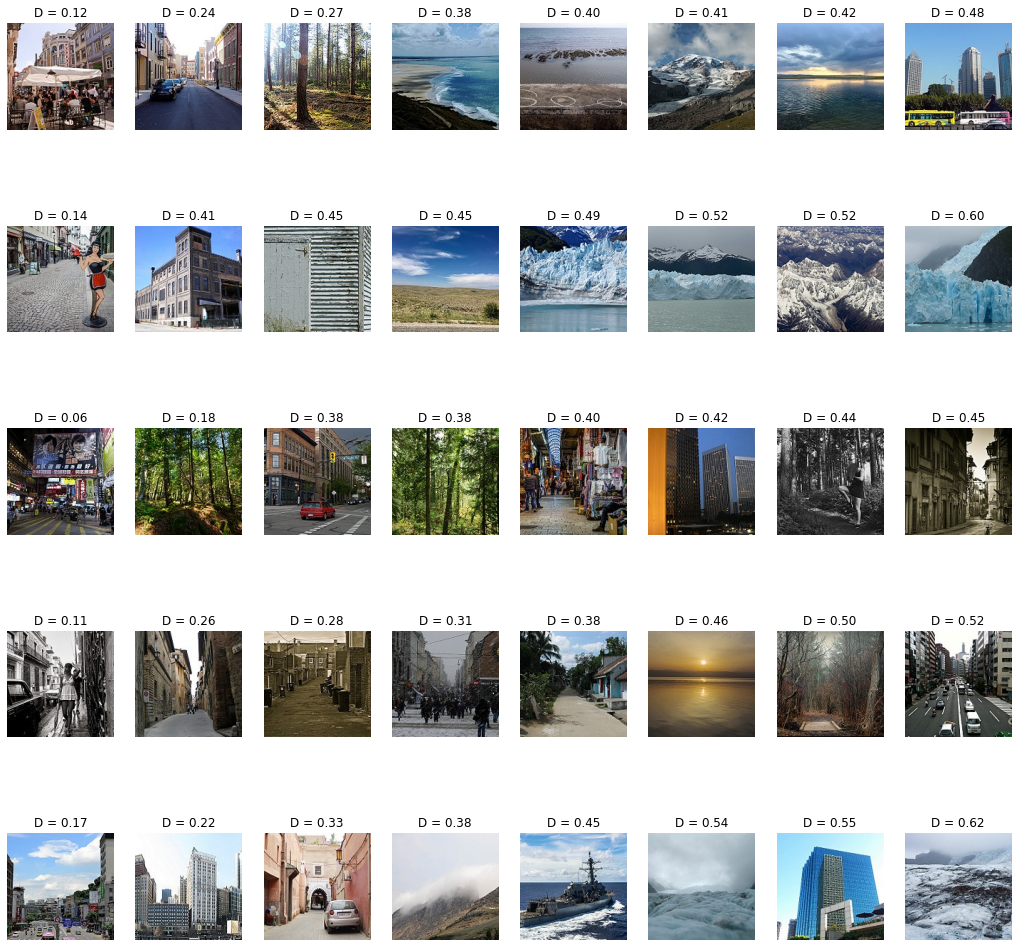

In [53]:
n_imagenes = len(X)
imagenes = np.array(X)
imagenes = imagenes.reshape((n_imagenes, 150, 150,3))
print(np.shape(imagenes))

plt.figure(figsize=(18,18))
for i in range(n_clusters):
    ii = np.argsort(distance[:,i]) # es el orden de los objetos de menor a mayor a la distancia de su cluster
    n_seq = 8
    for l, ind in enumerate(ii[:n_seq]):
        plt.subplot(n_clusters,n_seq,i*n_seq +l +1)
        plt.imshow((imagenes[ind]).astype(np.uint8))
        plt.title("D = {:.2f}".format(distance[ind,i]))
        plt.axis('off')
#plt.savefig('clasificacion.png')